In [114]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

## DATA ANALYSIS

In [65]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing values
The missing values will be treated like:
- if there is more than 50% missing values in a column, drop that.
- if there is less than 50% missing values, it will be substituted by the median (for numerical columns) or the mode (for categorical columns)

In [67]:
# check which columns have more than 50% missing values and drop them
missing_values = train_df.isnull().mean()
missing_values = missing_values[missing_values > 0.5]
print(f'Droped columns: {missing_values.index.tolist()}')
train_df = train_df.drop(missing_values.index, axis=1)

Droped columns: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [68]:
# check which numerical columns have less than 50% missing values and fill them with the median
numerical_columns = train_df.select_dtypes(include='number').columns
missing_values = train_df[numerical_columns].isnull().mean()
missing_values = missing_values[missing_values > 0]
print(f'Filled columns: {missing_values.index.tolist()}')
train_df = train_df.fillna(train_df[missing_values.index].median())

Filled columns: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [69]:
# check which categorical columns have less than 50% missing values and fill them with the most frequent value (mode)
categorical_columns = train_df.select_dtypes(include='object').columns
missing_values = train_df[categorical_columns].isnull().mean()
missing_values = missing_values[missing_values > 0]
print(f'Filled columns: {missing_values.index.tolist()}')
train_df = train_df.fillna(train_df[missing_values.index].mode().iloc[0])

Filled columns: ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


## AUTOGLUON

### Train model

In [70]:
label = 'SalePrice'
predictor = TabularPredictor(label=label, path='model/').fit(train_df)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:16:51 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       1.34 GB / 8.00 GB (16.7%)
Disk Space Avail:   14.96 GB / 228.27 GB (6.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for init

[1000]	valid_set's rmse: 27243.8
[2000]	valid_set's rmse: 26978.1
[3000]	valid_set's rmse: 26950
[4000]	valid_set's rmse: 26949.3


	-26946.9514	 = Validation score   (-root_mean_squared_error)
	6.46s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29704.3
[2000]	valid_set's rmse: 28930.3
[3000]	valid_set's rmse: 28748.3
[4000]	valid_set's rmse: 28715.7
[5000]	valid_set's rmse: 28709.5
[6000]	valid_set's rmse: 28708.1
[7000]	valid_set's rmse: 28707.9
[8000]	valid_set's rmse: 28707.9
[9000]	valid_set's rmse: 28707.9
[10000]	valid_set's rmse: 28707.9


	-28707.8568	 = Validation score   (-root_mean_squared_error)
	13.94s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-32042.1892	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-29099.7254	 = Validation score   (-root_mean_squared_error)
	119.65s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-31358.2947	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-29549.3595	 = Validation score   (-root_mean_squared_error)
	1.38s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-30447.4388	 = Validation score   (-root_mean_squared_error)
	1.62s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-36126.891	 = Validation score   (-root_mean_squared_error)
	2.2s	 = Training   runt

[1000]	valid_set's rmse: 33516.7


	-33499.9971	 = Validation score   (-root_mean_squared_error)
	9.24s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.556, 'LightGBM': 0.167, 'NeuralNetFastAI': 0.167, 'XGBoost': 0.111}
	-26438.6987	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 157.32s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1795.1 rows/s (292 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("model/")


## EVALUTE MODEL

In [116]:
actual = pd.read_csv('dataset/sample_submission.csv')
predicted = predictor.predict(test_df)
actual.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


In [93]:
predictor.evaluate_predictions(y_true=actual[label], y_pred=predicted)

{'root_mean_squared_error': -74334.56288020225,
 'mean_squared_error': -5525627238.590743,
 'mean_absolute_error': -55618.761707864884,
 'r2': -19.265087936291355,
 'pearsonr': 0.29653168302284594,
 'median_absolute_error': -45208.978009193}

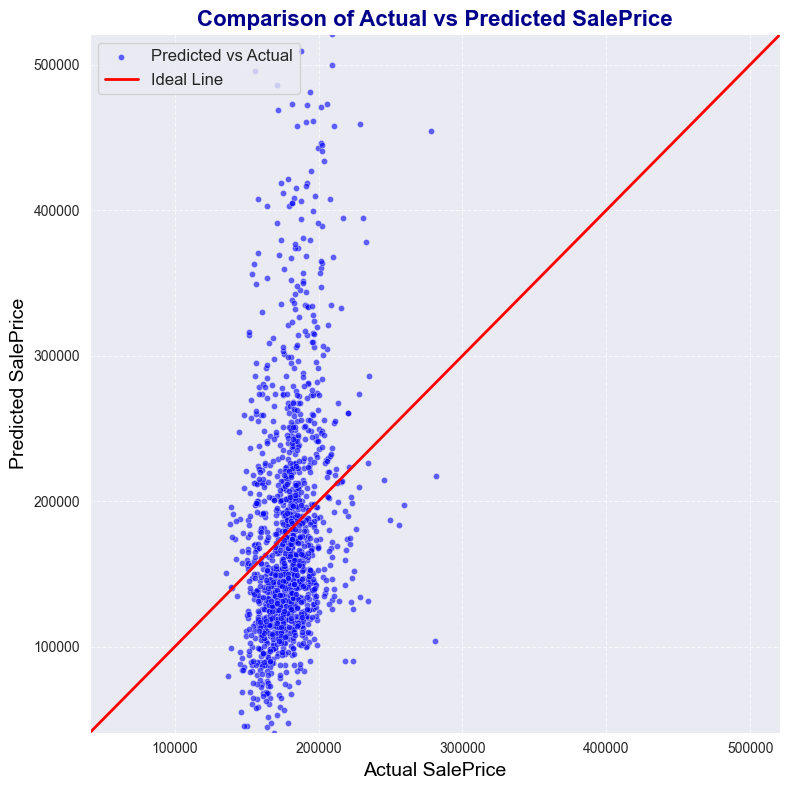

Actual min: 135751.318892816, max: 281643.976116786
Predicted min: 41090.484375, max: 520629.90625
Correlation: 0.29653168302284527


In [117]:
sns.set_style("darkgrid")

plt.figure(figsize=(8, 8))

sns.scatterplot(x=actual[label], y=predicted, color='blue', alpha=0.6, s=20, label='Predicted vs Actual')

max_value = max(actual[label].max(), predicted.max())
min_value = min(actual[label].min(), predicted.min())

sns.lineplot(x=[min_value, max_value], y=[min_value, max_value], color='red', linewidth=2, label='Ideal Line')

plt.title('Comparison of Actual vs Predicted SalePrice', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Actual SalePrice', fontsize=14, color='black')
plt.ylabel('Predicted SalePrice', fontsize=14, color='black')

plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

print(f"Actual min: {actual[label].min()}, max: {actual[label].max()}")
print(f"Predicted min: {predicted.min()}, max: {predicted.max()}")

print(f"Correlation: {np.corrcoef(actual[label], predicted)[0, 1]}")